In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta

In [2]:
from utils import *

2024-04-25 18:40:07.607 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-04-25 18:40:07.617 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [3]:
data = pd.read_csv('clean.csv')

In [4]:
data

,date,AQI,latitude,longitude
0,2023-04-01 00:00:00,45.765,27.889417,71.375264
1,2023-04-01 01:00:00,46.520,27.889417,71.375264
2,2023-04-01 02:00:00,47.640,27.889417,71.375264
3,2023-04-01 03:00:00,49.330,27.889417,71.375264
4,2023-04-01 04:00:00,51.210,27.889417,71.375264
...,...,...,...,...
9236,2024-04-19 20:00:00,64.075,27.889417,71.375264
9237,2024-04-19 21:00:00,64.950,27.889417,71.375264
9238,2024-04-19 22:00:00,63.735,27.889417,71.375264
9239,2024-04-19 23:00:00,61.845,27.889417,71.375264


In [5]:
today=get_today_date()
pd.to_datetime(today)

Timestamp('2024-04-25 00:00:00')

In [6]:
today = date.today()
last_week = today - timedelta(days = 7)
dates = [last_week + timedelta(days=i) for i in range(7)]
string_format = "%Y-%m-%d"
# Convert dates to strings using list comprehension
next_week_strings = [date.strftime(string_format) for date in dates]

In [7]:
days_dt = [pd.to_datetime(date) for date in next_week_strings]
days_dt

[Timestamp('2024-04-18 00:00:00'),
 Timestamp('2024-04-19 00:00:00'),
 Timestamp('2024-04-20 00:00:00'),
 Timestamp('2024-04-21 00:00:00'),
 Timestamp('2024-04-22 00:00:00'),
 Timestamp('2024-04-23 00:00:00'),
 Timestamp('2024-04-24 00:00:00')]

In [8]:
def create_hourly_increments(date):
  return pd.date_range(start=date, periods=24, freq='H')



In [9]:
hourly_dataframes = []
for date in days_dt:
    hourly_df = pd.DataFrame({'date': create_hourly_increments(date)}) 
    hourly_dataframes.append(hourly_df)

# Concatenate all DataFrames into a single DataFrame
all_hours_df = pd.concat(hourly_dataframes, ignore_index=True)

C:\Users\timmy\AppData\Local\Temp\ipykernel_25156\3052103098.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(start=date, periods=24, freq='H')


In [10]:
data

,date,AQI,latitude,longitude
0,2023-04-01 00:00:00,45.765,27.889417,71.375264
1,2023-04-01 01:00:00,46.520,27.889417,71.375264
2,2023-04-01 02:00:00,47.640,27.889417,71.375264
3,2023-04-01 03:00:00,49.330,27.889417,71.375264
4,2023-04-01 04:00:00,51.210,27.889417,71.375264
...,...,...,...,...
9236,2024-04-19 20:00:00,64.075,27.889417,71.375264
9237,2024-04-19 21:00:00,64.950,27.889417,71.375264
9238,2024-04-19 22:00:00,63.735,27.889417,71.375264
9239,2024-04-19 23:00:00,61.845,27.889417,71.375264


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9241 entries, 0 to 9240
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       9241 non-null   object 
 1   AQI        9241 non-null   float64
 2   latitude   9241 non-null   float64
 3   longitude  9241 non-null   float64
dtypes: float64(3), object(1)
memory usage: 288.9+ KB


In [12]:
data[data['date'] > '2024-04-17 00:00:00']

,date,AQI,latitude,longitude
9169,2024-04-17 01:00:00,54.995,27.889417,71.375264
9170,2024-04-17 02:00:00,54.990,27.889417,71.375264
9171,2024-04-17 03:00:00,56.955,27.889417,71.375264
9172,2024-04-17 04:00:00,59.580,27.889417,71.375264
9173,2024-04-17 05:00:00,62.900,27.889417,71.375264
...,...,...,...,...
9236,2024-04-19 20:00:00,64.075,27.889417,71.375264
9237,2024-04-19 21:00:00,64.950,27.889417,71.375264
9238,2024-04-19 22:00:00,63.735,27.889417,71.375264
9239,2024-04-19 23:00:00,61.845,27.889417,71.375264


In [13]:
all_hours_df

,date
0,2024-04-18 00:00:00
1,2024-04-18 01:00:00
2,2024-04-18 02:00:00
3,2024-04-18 03:00:00
4,2024-04-18 04:00:00
...,...
163,2024-04-24 19:00:00
164,2024-04-24 20:00:00
165,2024-04-24 21:00:00
166,2024-04-24 22:00:00


In [14]:
data_ = data[data['date'].isin(all_hours_df['date'].astype(str).values.tolist())]
data_

,date,AQI,latitude,longitude
9192,2024-04-18 00:00:00,50.295,27.889417,71.375264
9193,2024-04-18 01:00:00,74.720,27.889417,71.375264
9194,2024-04-18 02:00:00,105.825,27.889417,71.375264
9195,2024-04-18 03:00:00,117.825,27.889417,71.375264
9196,2024-04-18 04:00:00,101.570,27.889417,71.375264
9197,2024-04-18 05:00:00,90.710,27.889417,71.375264
9198,2024-04-18 06:00:00,97.710,27.889417,71.375264
9199,2024-04-18 07:00:00,105.140,27.889417,71.375264
9200,2024-04-18 08:00:00,110.985,27.889417,71.375264
9201,2024-04-18 09:00:00,118.175,27.889417,71.375264


In [19]:
today = date.today()
def past_week_model_data():
    last_week = today - timedelta(days = 7)
    dates = [last_week + timedelta(days=i) for i in range(7)]
    string_format = "%Y-%m-%d"
    # Convert dates to strings using list comprehension
    next_week_strings = [date.strftime(string_format) for date in dates]
    days_dt = [pd.to_datetime(date) for date in next_week_strings]

    # Create a list of DataFrames, each containing hourly increments for a date
    hourly_dataframes = []
    for date in days_dt:
        hourly_df = pd.DataFrame({'date': create_hourly_increments(date)}) 
        hourly_dataframes.append(hourly_df)

    # Concatenate all DataFrames into a single DataFrame
    all_hours_df = pd.concat(hourly_dataframes, ignore_index=True)  
    dates_ = all_hours_df['date'].astype(str).values.tolist()
    # now gwtting from the data
    data_ = data[data['date'].isin(all_hours_df['date'].astype(str).values.tolist())]
    # return the AQI column
    out = data_['AQI'].values
    # extending by adding zeros to make it 168
    out = np.append(out, np.zeros(168 - len(out)))

    # creating a dataframe with the date and the AQI
    out = pd.DataFrame({'date': dates_, 'AQI': out})
    return out

data1 = past_week_model_data()
data1

C:\Users\timmy\AppData\Local\Temp\ipykernel_25156\1270768182.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(date, periods=24, freq='H')
C:\Users\timmy\AppData\Local\Temp\ipykernel_25156\2011277540.py:20: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_ = data[data['date'].isin(all_hours_df['date'].astype(str).values.tolist())]


,date,AQI
0,2024-04-18 00:00:00,50.295
1,2024-04-18 01:00:00,74.720
2,2024-04-18 02:00:00,105.825
3,2024-04-18 03:00:00,117.825
4,2024-04-18 04:00:00,101.570
...,...,...
163,2024-04-24 19:00:00,0.000
164,2024-04-24 20:00:00,0.000
165,2024-04-24 21:00:00,0.000
166,2024-04-24 22:00:00,0.000


In [25]:
def today():
    return date.today()

def next_week_dates():
    next = today() + timedelta(days=7)
    dates = [next + timedelta(days=i) for i in range(7)]
    string_format = "%Y-%m-%d"
    next_week_strings = [date.strftime(string_format) for date in dates]
    days_dt = [pd.to_datetime(date) for date in next_week_strings]

    hourly_dataframes = []
    for date in days_dt:
        hourly_df = pd.DataFrame({'date': create_hourly_increments(date)})
        hourly_dataframes.append(hourly_df)

    all_hours_df = pd.concat(hourly_dataframes, ignore_index=True)
    return all_hours_df  # Return the DataFrame with hourly data

data = next_week_dates()
data

,date
0,2024-05-02 00:00:00
1,2024-05-02 01:00:00
2,2024-05-02 02:00:00
3,2024-05-02 03:00:00
4,2024-05-02 04:00:00
...,...
163,2024-05-08 19:00:00
164,2024-05-08 20:00:00
165,2024-05-08 21:00:00
166,2024-05-08 22:00:00


In [17]:
d = get_date_data(data, '2024-05-17')
d

C:\Users\timmy\AppData\Local\Temp\ipykernel_25156\1270768182.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.date_range(date, periods=24, freq='H')
C:\Users\timmy\AppData\Local\Temp\ipykernel_25156\1270768182.py:11: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_ = df[df['date'].isin(hourly_df['date'].astype(str).values.tolist())]


,date,AQI,latitude,longitude


<Axes: >

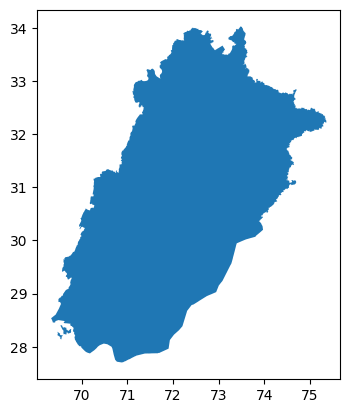

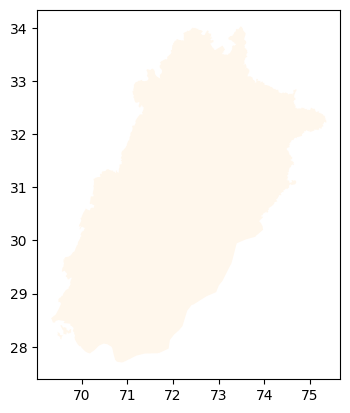

In [28]:
import geopandas as gpd

# Specify the path to your shapefile (including .shp extension)
shp_filepath = "punjabaoi/aoi_punjab.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shp_filepath)

# Simple plot using GeoPandas plotting methods
gdf.plot()  # Basic plot with default styling
gdf.plot(cmap="OrRd")  # Plot with color based on a column and colormap


In [44]:
import folium
from folium.features import GeoJson

# Load your shapefile
gdf = gpd.read_file('punjabaoi/aoi_punjab.shp')

# Calculate average centroid coordinates
center_x = 31.1471
center_y = 75.3412

# Create the Folium map (consider using basemap like 'Stamen.Toner')
m = folium.Map(location=[center_x, center_y], zoom_start=7)

# Define a style function for a transparent fill (optional, adjust opacity if needed)
def style_function(feature):
  return {
    'fillColor': 'none',  # Transparent fill
    'weight': 2,          # Adjust border weight
    'color': 'red',       # Set border color (optional)
    'opacity': 0.4        # Adjust border opacity (optional)
  }

# Add GeoJSON layer as an overlay with the style function
folium.GeoJson(data=gdf.to_json(), name='My Shapefile', style_function=style_function, overlay=True).add_to(m)

# Display the map
m


## Extra analysis

In [5]:
# function to get the current hour of the day 
def get_current_hour():
    return datetime.datetime.now().hour

# function to get the current date
def get_current_date():
    return datetime.datetime.now().date()

print(get_current_hour())
print(get_current_date())

12
2024-04-26
